## Load the library ##

In [1]:
## inspired by https://commercedataservice.github.io/tutorial_biz_dynamics/
from IPython.display import display
import io, requests, zipfile
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from plotly import __version__
## print (__version__) ## requires version >= 1.9.0

## Generating Offline Graphs within Jupyter Notebook
## https://plot.ly/python/offline/
## init_notebook_mode(connected=True)

In [2]:
## http://mcdc.missouri.edu/data/popests/CBSA-EST2014-alldata.csv
## read in data with specified encoding
path = './input/Stats19_Data_2005-2014/'

In [3]:
acc = pd.read_csv(path + "Accidents0514.csv", encoding = "ISO-8859-1")

/Users/udothemath1984/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
cau = pd.read_csv(path + "Casualties0514.csv", encoding = "ISO-8859-1")

In [5]:
veh = pd.read_csv(path + "Vehicles0514.csv", encoding = "ISO-8859-1")

## Set up display environment ##

In [6]:
#pd.set_option('display.max_colwidth', -1)
#pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

In [20]:
display(acc.head(3))

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857


In [8]:
display(cau.head(3))

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1


In [9]:
display(veh.head(3))

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0,0,0,0,0,1,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,11,0,4,0,3,0,0,0,0,4,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,1,11,0,17,0,0,0,4,0,0,4,1,1,1,35,6,8300,2,5,2,1


## Find urban accident occurrence ##

In [19]:
## https://data.gov.uk/dataset/road-accidents-safety-data
print(acc['Urban_or_Rural_Area'].value_counts())
print(len(acc))

# 1 = Urban area
# 2 = Small town
# 3 = Rural

# -1 = Data missing or out of range

1    1054341
2     586113
3        143
Name: Urban_or_Rural_Area, dtype: int64
1640597


**Q:** What fraction of accidents occur in urban areas? Report the answer in decimal form.

In [18]:
acc_tot = len(acc)
acc_urban = acc['Urban_or_Rural_Area'].value_counts()[1]
print(round(acc_urban/acc_tot, 10))

0.6426569109


In [21]:
print(type(acc['Date']))

<class 'pandas.core.series.Series'>


In [22]:
## define the function in the desired date format
dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y')

In [23]:
print(dateparse)

<function <lambda> at 0x106c5e0d0>


In [25]:
acc = pd.read_csv(path + "Accidents0514.csv", parse_dates=['Date'], \
                  index_col=['Date'], date_parser=dateparse, encoding = "ISO-8859-1")


/Users/udothemath1984/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.



In [26]:
display(acc.head(3))

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-04,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849
2005-01-05,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909
2005-01-06,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857


In [90]:
##acc.loc['2005']
##acc_year = acc.groupby(acc.index.year)['Urban_or_Rural_Area'].value_counts()
acc_year = acc.groupby(acc.index.year)['Urban_or_Rural_Area'].count()
acc_year

Date
2005    198735
2006    189161
2007    182115
2008    170591
2009    163554
2010    154414
2011    151474
2012    145571
2013    138660
2014    146322
Name: Urban_or_Rural_Area, dtype: int64

**Q:** There appears to be a linear trend in the number of accidents that occur each year. What is that trend? Return the slope in units of increased number of accidents per year.

In [92]:
##print(type(acc_year))
y = acc_year.values
##print(y)
x = acc_year.index.values.reshape(-1, 1)
##print(x)
##print(type(x))

In [93]:
# from sklearn import datasets, linear_model
# import matplotlib.pyplot as plt

np.set_printoptions(precision=10)

regr = linear_model.LinearRegression()
regr.fit(x, y)
print(regr.coef_)
print(regr.intercept_)

[-6511.7272727273]
13249375.6545


In [ ]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [78]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

display(diabetes_X[:3])

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121]])

In [80]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [82]:
display(diabetes_y_train[:3])

array([ 151.,   75.,  141.])

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


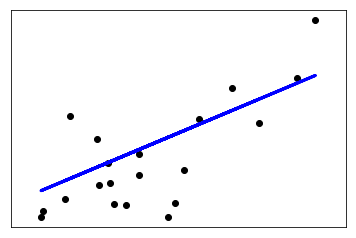

In [85]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Automatically created module for IPython interactive environment
Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


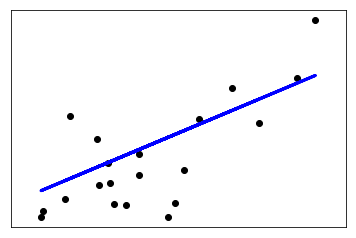

In [ ]:
#display(acc.head(3))
#print(acc.head(3))

acc_10 = acc.head(10)
display(acc_10)
acc_10.groupby('Urban_or_Rural_Area').count()

print(acc['Urban_or_Rural_Area'].value_counts())
print(len(acc))
#pd.set_option('display.max_colwidth', 50)

In [ ]:
1054341/1640597

In [ ]:
def get_data(msa_code, var_dict, para_dict):
    ## catenate keys using str.join() method.
    r = requests.get('http://api.census.gov/data/timeseries/bds/firms?get=' \
                     + ','.join(var_dict.keys()) \
                     + '&for=metropolitan+statistical+area:'\
                     + str(msa_code), \
                    params=para_dict)
    
    ## print(r)
    ## when url returns empty content, return None
    if r.content is b'': 
        return None
    else:
        ## read in data
        data = pd.DataFrame(r.json())
        
        ## get columns names from first row and map them to the given names in var_dict
        columns = data.iloc[0,:-len(para_dict)].map(var_dict)
        
        ## data we are interested in 
        data = data.iloc[1:,:-len(para_dict)]
        
        ## rename dataframe columns
        data.columns = columns
        
        return data

In [ ]:
## request data via https
## https://www2.census.gov/econ/susb/data/
r = requests.get('https://www2.census.gov/econ/susb/data/msa_codes_2007_to_2011.txt').content

## read and parse data
msa_code = pd.read_table(io.StringIO(r.decode('utf-8')), header=3, sep='   ') 

## rename columns
msa_code.columns = ['code','name'] 

## get rid of micropolitan statistical areas
msa_code = msa_code[msa_code['name'].str.contains('Metropolitan', case = False)]

## clean up names
msa_code['name'] = msa_code['name'].str.replace(' Metropolitan Statistical Area', '') 

## function to clean up MSA names, only keep the fist city and fist state
def name_clean(s):
    s_list = s.split(', ')
    cities = s_list[0]
    states = s_list[-1]
    return ' '.join([cities.split('-')[0], states.split('-')[0]])

## map the name_clean function to all MSA
msa_code['name'] = msa_code['name'].map(name_clean) 

In [ ]:
api_key = '377a44f6cb37b1197c1b43db457bbb4e1330db9f'

In [ ]:
def survival_rate(name, start_year):
    
    #fage4 is the firm age in a given year. Letters a through f represent years 0 through 5
    fage4_values = ['a', 'b', 'c', 'd', 'e', 'f']
    
    #The data only covers up to 2013 (as of now), so we will limit the fage4_values to ones within 2013 minus start_year
    if 2013 - start_year < 6:
        fage4_values = fage4_values[0:(2013-start_year + 1)]

    #var_dict contains the variables and their labels
    var_dict = {'estabs': 'Establishments',
                'emp': 'Employment',
                'firms': 'Firms'}
    
    #set up empty array to accept results from get_data
    result = []
    
    #grab the msa code based on the 'name' provided in the input parameters
    code = msa_code[msa_code['name'].str.contains(name, case = False)]['code'].values[0]
    ## print(code)  # 35620 for survival_rate('New York', 2009)
    ## print(fage4_values)
    #Loop from start year to the 5th year (or the cap year if end years exceed 2013)
    for i in range(len(fage4_values)):
        para_dict = {'fage4': fage4_values[i], 'time': start_year+i }
        result.append(get_data(code, var_dict, para_dict))
        ## print(para_dict)
        
    #The code was returning an error as not all variables were integer friendly (e.g. there was a phantom column of letters)
    #Added in a drop statement to keep only variables 0:4 
    df = pd.concat(result).iloc[:, 0:3].astype(int)
    df.index = range(start_year,start_year+len(fage4_values))

    ## print(df.index)
    #Calculate point survival rate
    #Step 1: Create denominator dataframe
    #Shift rows up 1
    df2 = df.shift(1)
    
    #Replace blank row with 
    df2.iloc[[0]] = df.iloc[[0]]
    
    #Step 2: Divide numerator (df) by denominator (df2)
    df3 = df/df2

    #Step 3: Calculate cumulative product on instantaneous survival rate table
    df4 = df3.cumprod()*100

    
    ### start plotting using plotly
    data = []
    for label in df4.columns:
        trace = go.Scatter(
            x = df4.index,
            y = df4[label].values,
            name = label
        )
        data.append(trace)

    layout = dict(title = 'Business Survival Rates, '+ name +' Metropolitan Area, Year: '+str(start_year),
                  yaxis = dict(title = 'survival rate (%)'),
                  xaxis = dict(title = 'year', nticks = len(df4)),
                  )

    fig = dict(data=data, layout=layout)
    iplot(fig)



In [ ]:
## draw down zip file, unzip, read in txt with specified encoding
r = requests.get("http://www2.census.gov/geo/docs/maps-data/data/gazetteer/2015_Gazetteer/2015_Gaz_cbsa_national.zip")
z = zipfile.ZipFile(io.BytesIO(r.content))
geo = pd.read_table(z.open('2015_Gaz_cbsa_national.txt'), encoding = "ISO-8859-1")


In [ ]:
## clean the columns names and change to lower case
## https://www.census.gov/geo/maps-data/data/gazetteer2015.html
geo.columns = [field.rstrip().lower() for field in geo.columns]

## get rid of micropolitan statistical areas and clean the names the same as msa_code 
geo = geo[geo['name'].str.contains('Metro', case = False)]
geo['name'] = geo['name'].str.replace(' Metro Area', '')
geo['name'] = geo['name'].map(name_clean)

In [ ]:
display(geo.head(5))

### Population estimates

In [ ]:
## http://mcdc.missouri.edu/data/popests/CBSA-EST2014-alldata.csv
## read in data with specified encoding
pop = pd.read_csv("http://mcdc.missouri.edu/data/popests/CBSA-EST2014-alldata.csv", 
                  encoding = "ISO-8859-1")
pop = pop[pop['LSAD']=='Metropolitan Statistical Area']
pop = pop[['CBSA','POPESTIMATE2014']]
pop.columns = ['geoid', 'population']

In [ ]:
display(pop.head(5))

In [ ]:
geo = geo.merge(pop, how='inner', left_on='geoid', right_on='geoid')

#Merge msa_code to geo
msa_code = msa_code.merge(geo[['name','intptlat','intptlong','population', 'aland_sqmi']],how='left', left_on='name', right_on='name')
msa_code = msa_code.dropna()

In [ ]:
display(msa_code.head(5))

In [ ]:
## specify starting year of analysis
start_year = 2008

## letters indicating firm age
fage4_values = ['a', 'b', 'c', 'd', 'e', 'f'] 

## deisred variables
var_dict = {'firms': 'firms',
            'emp': 'jobs'} 

## empty dataframe as placeholder
df = pd.DataFrame(columns = ['name', 'population', 'aland_sqmi', 'lat', 'lon', '5-year firm survival', 
                             '5-year job survival', 'number of jobs', 'number of firms'])

print('Fetching data for...')
## iterate through every MSA with a population bigger than 250,000
count = 0
for idx, row in msa_code[msa_code['population']>=2.5e5].iterrows():
    
    ## code and name of current MSA
    code = row['code']
    ##print('    '+row['name'])
    
    ## place holder for results
    result = []
    
    ## iterate through age 0 - 5
    for i in range(6):
        para_dict = {'fage4': fage4_values[i], 'time': start_year + i, 'key': api_key}
        result.append(get_data(code, var_dict, para_dict))

    ## check for empty results
    if any([d is None for d in result]):
        continue
        
    #The code was returning an error as not all variables were integer friendly (e.g. there was a phantom column of letters)
    #Added in a drop statement to keep only variables 0:4 
    df0 = pd.concat(result).iloc[:, 0:3].astype(int)
    df0.index = range(start_year,start_year+len(fage4_values))

    #Calculate point survival rate
    #Step 1: Create denominator dataframe
    #Shift rows up 1
    df1 = df0.shift(1)
    
    #Replace blank row with 
    df1.iloc[[0]] = df0.iloc[[0]]
    
    #Step 2: Divide numerator (df) by denominator (df2)
    df2 = df0/df1
    

    #Step 3: Calculate cumulative product on instantaneous survival rate table, keep only year 5
    df3 = df2.cumprod()*100
    
    ## copy the initial number of jobs and firms
    df.loc[code, ['number of jobs', 'number of firms']] = df0.iloc[[0]][['jobs', 'firms']].values

     ## copy the initial survival probs
    df.loc[code, ['5-year firm survival', '5-year job survival']] = df3.iloc[[5]][[ 'firms','jobs']].values

    ## copy the namem population and location of MSA
    df.loc[code, ['name', 'population', 'aland_sqmi', 'lat', 'lon']] = row[['name', 'population', 'aland_sqmi', 'intptlat','intptlong']].values 
    
    ## Testing termination
#     count += 1
#     if count >= 3:
#         break
print('Done!')



In [ ]:
# https://stackoverflow.com/questions/28754658/whats-the-fastest-way-to-pickle-a-pandas-dataframe
## build-in pickle method
df.to_pickle('df_city_info.p')

# import pickle
# df.to_pickle()

In [ ]:
display(df.head(3))

In [ ]:
per_unit = 1000
df['firm_population_ratio'] = per_unit* df['number of firms'] / df['population']    
df['job_population_ratio'] = per_unit * df['number of jobs'] / df['population'] 

In [ ]:
def map_bubblePlot(size_field, color_field): 
    scaling_for_job = 2000
    
    ## white     : rgb(255, 255, 255)
    ## redish    : rgb(255, 0, 0)
    ## yellowish : rgb(255, 255, 0)
    ## bluish    : rgb(0, 0, 255)
    ## cryan     : rgb(0, 255, 255)
    ## yellow    " rgb(255, 255, 0)

    bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.9, 0.97, 1]
    n_color_segment = len(bins) - 1
    ## print(n_color_segment)
    each_increment = float(256 / n_color_segment) 
    colors = ["rgb(255, {}, {})".format(255-i*each_increment, 255-i*each_increment) \
              for i in range(0,n_color_segment)]
    
    qs = df[color_field].quantile(bins).values
    ## print(qs)
    color_map = pd.qcut(df[color_field], bins, labels=[i for i in range(n_color_segment)])
               
    df['text'] = (df['name'] 
    + '<br>population: ' + (df['population']/1e6).map(lambda x: '%2.1f' % x) + ' million'
    + '<br>' + size_field + ': ' + df[size_field].map(lambda x: '{:,}'.format(x))
    + '<br>' + color_field + ': ' + df[color_field].map(lambda x: '%2.2f' % x) + '%')

    trace0 = go.Scatter(
        name='Area Size: '+ size_field
             + '<br>' + 'Color Darkness: ' + color_field,
        x=list(df['population'].values),
        y=list(df['aland_sqmi'].values),
        mode='markers',
        marker=dict(
            color=["rgb(255, {}, {})".format(255-i*each_increment, 255-i*each_increment) \
              for i in color_map],
    #         opacity=[1, 0.8, 0.6, 0.4],
            size=df[size_field].values/scaling_for_job
        ),
        text=df['text']
    )
    layout = dict(
    #title = size_field+' created in 2008, grouped by '+color_field,
        showlegend = True,
        xaxis=dict(
            title="Number of population",
            ),
        yaxis=dict(
            title="Size of city (mi^2)",
        ),
        margin=go.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4,
        ),

    )
    
    data = [trace0]    
    fig = dict( data=data, layout=layout)
    iplot(fig, filename='bubblechart-color')
        

In [ ]:
def map_plot(size_field, color_field):
    
    ## value to scale down bubble size
    scale = df[size_field].max()/4e3
    
    
    ## https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html
    ## setting quantiles
    bins = [0, 0.03, 0.1, 0.5, 0.9, 0.97, 1]
    
    ## setting colors
    ##colors = ['#8c510a', '#d8b365', '#f6e8c3', '#c7eae5', '#5ab4ac', '#01665e']
    n_color_segment = 6
    each_increment = float(256 / n_color_segment) 
    ## white     : rgb(255, 255, 255)
    ## redish    : rgb(255, 0, 0)
    ## yellowish : rgb(255, 255, 0)
    ## bluish    : rgb(0, 0, 255)
    ## cryan     : rgb(0, 255, 255)
    ## yellow    " rgb(255, 255, 0)
#     colors = ["rgb(255,{},{})".format(255-i*each_increment, 255-i*each_increment) \
#               for i in range(0,n_color_segment)]

    colors = ["rgb(255, {}, {})".format(255-i*each_increment, 255-i*each_increment) \
              for i in range(0,n_color_segment)]
    ##print(colors)
    ## place holder for msa traces 
    msas = []
    
    ## text to show when mouse move over
    df['text'] = (df['name'] 
        + '<br>population: ' + (df['population']/1e6).map(lambda x: '%2.1f' % x) + ' million'
        + '<br>' + size_field + ': ' + df[size_field].map(lambda x: '{:,}'.format(x))
        + '<br>' + color_field + ': ' + df[color_field].map(lambda x: '%2.2f' % x) + '%')
    
    ## calculate the corresponding values for each quantile
    qs = df[color_field].quantile(bins).values
    
    ##print(qs)
    
    ## iterate through each group
    for lower, upper, color in zip(qs[:-1], qs[1:], colors):
        
        ## handling lower bound
        if color==colors[0]: 
            df_sub = df[(df[color_field]<upper)]
            
            ## format the value for display
            name = '< {0:.0f}%'.format(upper)
            
        ## handling upper bound
        elif color==colors[-1]: 
            df_sub = df[(df[color_field]>lower)]
            name = '> {0:.0f}%'.format(lower)
        ## other groups    
        else: 
            df_sub = df[(df[color_field]>lower)&(df[color_field]<=upper)]
            name = '{0:.0f}% - {1:.0f}%'.format(lower,upper)
        
        ## put data into a dictionary in plotly format
        msa = dict(
            type = 'scattergeo',
            locationmode = 'USA-states',
            lon = df_sub['lon'],
            lat = df_sub['lat'],
            text = df_sub['text'],
            marker = dict(
                size = df_sub[size_field]/scale,
                color = color,
                line = dict(width=0.5, color='rgb(40,40,40)'),
                sizemode = 'area'
            ),
            name = name )
        
        ## append current data to placeholder
        msas.append(msa)
    
    ## setting figure title and layout
    layout = dict(
        title = size_field + ' created in 2008, grouped by '+color_field,
        showlegend = True,
        margin=go.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
        ),
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'white',
            subunitwidth=0.5,
            countrywidth=0.5,
            subunitcolor="gray",
            countrycolor="gray",
        ),
    )

    fig = dict( data=msas, layout=layout )
    iplot(fig)

In [ ]:
map_plot('number of jobs', '5-year job survival')
map_bubblePlot('number of jobs', '5-year job survival')

In [ ]:
display(df.head(3))

In [ ]:
df_job_pop = df.sort_values(by=['job_population_ratio'], ascending=False)

df_firm_pop = df.sort_values(by=['firm_population_ratio'], ascending=False)

In [ ]:
display(df_job_pop.head(3))
display(df_firm_pop.head(3))

## Second Plot ##

In [ ]:
# https://plot.ly/python/horizontal-bar-charts/
# import plotly.plotly as py
# import plotly.graph_objs as go

top_n = 10

my_desired_property = '5-year firm survival'

## white     : rgb(255, 255, 255)
## redish    : rgb(255, 0, 0)
## yellowish : rgb(255, 255, 0)
## bluish    : rgb(0, 0, 255)
## cryan     : rgb(0, 255, 255)
## yellow    " rgb(255, 255, 0)

bins = [0, 0.03, 0.05, 0.1, 0.2, 0.25, 0.5, 0.9, 0.97, 1]
n_color_segment = len(bins) - 1
## print(n_color_segment)
each_increment = float(256 / n_color_segment) 

color_map = pd.qcut(df_firm_pop[my_desired_property], bins, labels=[i for i in range(1, n_color_segment+1)])

qs = df_firm_pop[my_desired_property].quantile(bins).values
# print(qs)
# print(df_firm_pop[my_desired_property][:top_n])
# print(color_map[:top_n])

data = [go.Bar(
            x=df_firm_pop['firm_population_ratio'][:top_n],
            y=df_firm_pop['name'][:top_n],
            orientation = 'h',
            text = ["{:.2f}".format(i) for i in df_firm_pop[my_desired_property]],
            textfont=dict(
                family='sans serif',
                size=18,
                color='#41f4be'
            ),
            textposition = 'auto',
            marker=dict(
              color=["rgb({}, {}, 255)".format(255-i*each_increment, 255-i*each_increment) \
              for i in color_map],
        ),
)]

layout = dict(
        title = "Color with text indicates the 5-year firm survival rate (Higher the better)",
        showlegend = True,
        xaxis=dict(
            title="firm / population (per 10^3)",
            ),
        yaxis=dict(
            title="",
        ),
        margin=go.Margin(
        l=150,
        r=50,
        b=100,
        t=100,
        pad=4,
        ),

    )
    
fig = dict( data=data, layout=layout)

layout['showlegend'] = False
iplot(fig, filename='horizontal-bar')

The previous plot shows the city with highest firm/population ratio among the large city (population $\ge$ 25,000). Every 1000 people, there are $\approx$ 2.88 firms in Boulder, CO. The 5-year firm survival rate at Boulder is 49.33 %, indicating its healthy survival strength. In general, the 10 top most firm/population city have high firm survival rate. Is there any other reason behind this observation?

In [ ]:
# https://plot.ly/python/horizontal-bar-charts/
# import plotly.plotly as py
# import plotly.graph_objs as go

my_interest = '5-year job survival'

top_n = 10

bins = [0, 0.03, 0.05, 0.1, 0.2, 0.25, 0.5, 0.9, 0.97, 1]
n_color_segment = len(bins) - 1
## print(n_color_segment)
each_increment = float(256 / n_color_segment) 

color_map = pd.qcut(df_job_pop[my_interest], bins, labels=[i for i in range(1, n_color_segment+1)])
qs = df_job_pop[my_interest].quantile(bins).values
# print(qs)
# print(df_job_pop[my_interest][:top_n])
# print(color_map[:top_n])

df_format = df_job_pop.style.format("{:.2%}")

data = [go.Bar(
            x=df_job_pop['job_population_ratio'][:top_n],
            y=df_job_pop['name'][:top_n],
            text = ["{:.2f}".format(i) for i in df_job_pop[my_interest]],
            textfont=dict(
                family='sans serif',
                size=18,
                color='#41f4be'
            ),
            textposition = 'auto',
            orientation = 'h',
            marker=dict(
              color=["rgb({}, {}, 255)".format(255-i*each_increment, 255-i*each_increment) \
              for i in color_map],
        ),
)]

layout = dict(
        title = "Color with text indicates the 5-year job survival rate (Higher the better)", 
        showlegend = True,
        xaxis=dict(
            title="job / population (per 10^3)",
            ),
        yaxis=dict(
            title="",
        ),
        margin=go.Margin(
        l=150,
        r=50,
        b=100,
        t=100,
        pad=4,
        ),

    )
    
fig = dict( data=data, layout=layout)

layout['showlegend'] = False
iplot(fig, filename='horizontal-bar_job')

The previous plot shows the city with highest job/population ratio among the large city (population $\ge$ 25,000). Every 1000 people, there are $\approx$ 19.9 % jobs in Utica, NY. The 5-year job survival rate is 94.94, indicating the healthy employment environment. In contrast, the 5-year job survival rate is very low in Beaumont, TX, even though it has high job/population ratio (16.92 per 1000 population). The further investigation could reveal the underneath reason, which is critical to improve the job market at low job survival rate city. 